## Discrete Distributions

Open in Google Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/stat2025/blob/main/06-Discrete-Random-Variables.ipynb)


Until now we have been looking at experiments (games) where the outcome of the game is uncertain and have seen how we can calculate
probabilities of events associated with these games. For example, we counted the number of ways to get a sum greater than 10 when rolling two dice (@exr-simulation-dice-rolls),
assumed a probability model for the dice rolls (equally likely outcomes), and calculated the probability of the event of interest.

In this section, we will look at functions that map the outcomes of an experiment to a real number. You toss a coin 2 times (independently) and win 1 EUR if you get a head at least once. 

The sample space of the experiment is 

$$
\Omega = \{HH, HT, TH, TT\}
$$

where H denotes heads and T denotes tails. Let $w$ be an outcome (one of the four elements) in the sample space $\Omega$. The payoff function $X(w)$ is defined as follows:

$$
X(\omega) = \begin{cases}
0 & \text{if } \omega = TT \\
1 & \text{if } \omega = HT \text{ or } \omega = TH \text{ or } \omega = HH \\
\end{cases}
$$

Let's assume that the coin is fair so that each sequence of two coin tosses is equally likely. Then the probability of each outcome in $\Omega$ is $1/4$. Then the probability of winning nothing is

$$
P(X = 0) = P(\{TT\}) = \frac{1}{4}
$$

the probability of winning 1 EUR is

$$
P(X = 1) = P(\{HH, HT, TH\}) = 1- P(\{TT\}) = 1- \frac{1}{4} = \frac{3}{4}
$$

These two probabilities provide a complete description of the payoff in this game. We call the function $f(x)$ that assigns the possible payoffs to their probabilities the **probability mass function** (PMF) of the random variable $X$. In this case, the PMF is very simple:

$$
f(x) = \begin{cases}
\frac{1}{4} & \text{if } x = 0 \\
\frac{3}{4} & \text{if } x = 1 \\
0 & \text{otherwise}
\end{cases}
$$


Text(0, 0.5, 'Probability')

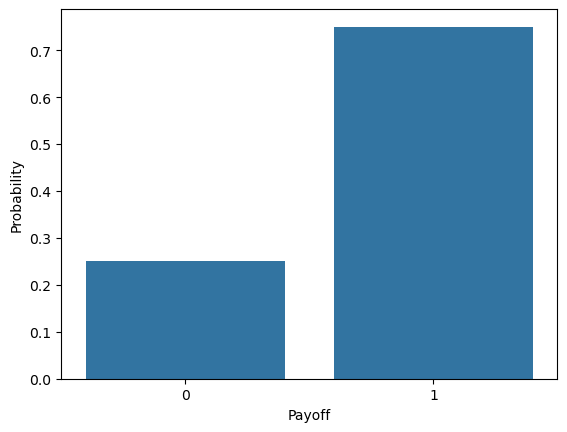

In [6]:
#| label: fig-coins-pmf-plot
#| caption: Plot of the probability mass function of the payoff of the coin game.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x=[0, 1], y=[1/4, 3/4])
plt.xlabel('Payoff')
plt.ylabel('Probability')

In [11]:
# Simulate the game


# We use 0 to represent heads and 1 to represent tails
coins_game = np.random.choice([0, 1], size=[1000, 2])
df_coins = pd.DataFrame(coins_game, columns=['toss1', 'toss2'])
df_coins.head()

,toss1,toss2
0,1,0
1,1,1
2,0,0
3,0,1
4,1,1


In [ ]:
# The payoff is equal to 1 EUR if there is at least one head

df_coins["payoff"] = ((df_coins["toss1"] + df_coins["toss2"]) > 0).astype(int)
df_coins.head()

,toss1,toss2,payoff
0,1,0,1
1,1,1,1
2,0,0,0
3,0,1,1
4,1,1,1


In [16]:
# Now let's count how many times we won 1 EUR and how many times we
# were left empty-handed

df_coins["payoff"].value_counts()

payoff
1    758
0    242
Name: count, dtype: int64

In [17]:
df_coins["payoff"].value_counts(normalize=True)

payoff
1    0.758
0    0.242
Name: proportion, dtype: float64

Text(9.444444444444445, 0.5, 'Proportions')

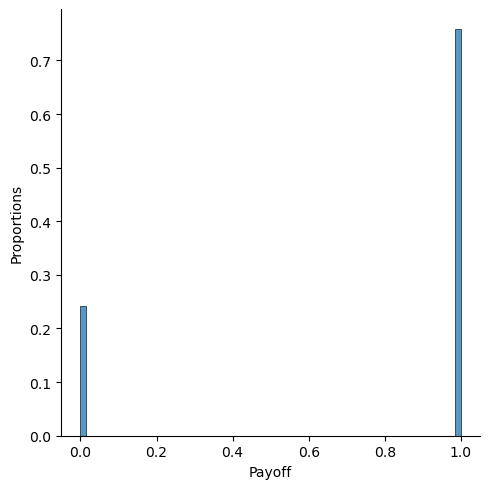

In [15]:
#| label: fig-coins-epmf-simulated
#| caption: Empirical probability mass function of the payoff of the coin game.

sns.displot(x="payoff", data=df_coins, stat='probability')

plt.xlabel('Payoff')
plt.ylabel('Proportions')

## Exercise (Probability Mass Function)

Which one of the following is not a valid probability mass function?

1. $f(x) = \frac{1}{4}$ for $x = 0, 1, 2, 3$ and $f(x) = 0$ otherwise
2. $f(x) = \frac{1}{2}$ for $x = 0, 1$ and $f(x) = -1$ otherwise
3. 

$$ f(x) = \begin{cases}
\frac{1}{4} & \text{if } x = 0 \\
\frac{1}{2} & \text{if } x = -1 \\
0 & \text{otherwise}
\end{cases}
$$

4. 

$$ f(x) = \begin{cases}
\frac{1}{4} & \text{if } x = 0 \\
\frac{1}{2} & \text{if } x = -1 \\
\frac{1}{2} & \text{if } x = 3.5 \\
0 & \text{otherwise}
\end{cases}
$$



Construct the PMF of a random variable $X$ that is the sum of the outcomes of rolling two fair four-sided dice. The sample space of the experiment is

$$
\Omega = \left\{\begin{array}{cccc}
1,1 & 1,2 & 1,3 & 1,4 \\
2,1 & 2,2 & 2,3 & 2,4 \\
3,1 & 3,2 & 3,3 & 3,4 \\
4,1 & 4,2 & 4,3 & 4,4 \\
\end{array}\right\}
$$


## Probability Mass Function

:::{#def-pmf}
## Probability Mass Function

For a discrete random variable $X$, the probability mass function (PMF) maps each possible value of $X$ to its probability. The PMF is denoted by $f(x)$ and satisfies the following properties:

1. $f(x) \geq 0$ for all $x$.
2. $\sum_{x} f(x) = 1$.

With words:

1. For a function to be a PMF, it must be non-negative for all possible values of $X$.
2. The sum of the probabilities of all possible values of $X$ must be 1.

:::

In our example of the coin tossing game, the PMF is obviously non-negative and the sum over all possible values is:

$$
\sum_x f(x) = \sum_x P(X = x) = P(X = 0) + P(X = 1) = \frac{1}{4} + \frac{3}{4} = 1
$$


:::{.callout-important}
## Random Variables and *outcomes* of Random Variables

It is important to distinguish between the *outcomes* that a random variable can take and the random variable itself. To emphasize this distinction, we will use capital letters for random variables and lower case letters for the possible outcomes.

When reading the expression $P(X = x)$, we should understand it as the probability of the *outcome* $x$ of the random variable $X$.

In our coin tossing example the random variable $X$ can take two values: 0 EUR and 1 EUR. The probability of getting a head is $P(X = 1) = 3/4$. The probability of receiving a payoff of -2.1 EUR is $P(X = -2.1) = 0$.

:::


## Expected Value

Imagine that you are organizing this game, anyone can purchase a ticket and play the game. If he or she gets at least one head, he or she wins 1 EUR. Let's assume that you will sell 1000 tickets. How much money do you expect to make?

The answer to this question obviously boils down to two things:

- The price of the ticket (this will be your revenue)
- The expected payoff of each game (this will be your costs)

You can imagine the payoff of each game as picking at random a ticket from a huge box of tickets where each ticket has a number between 0 and 1. 3/4 of the tickets have a 1 and 1/4 have a 0. The expected payoff of each game is the average payoff of the ticket you draw.

:::{.callout-note}
## Two ways to compute an average

Let's look at a set of 10 values: [1, 0, 0, 1, 1, 0, 1, 0, 1, 1]. We want to calculate the average, which is simply the sum of all values divided by the number of values.

$$
\frac{1 + 0 + 0 + 1 + 1 + 0 + 1 + 0 + 1 + 1}{10} = 0.6
$$

Another (equivalent) way to calculate the same average is to group the unique values and multiply these with their frequency.

The one occurs 6 times in the set and the zero occurs 4 times. Therefore, we can write the average as 

$$
\frac{6 \cdot 1 + 4 \cdot 0}{10} = \frac{6}{10}\cdot 1 + \frac{4}{10}\cdot 0 = 0.6
$$

This means that we can count how many times each value occurs, compute the relative frequency (the proportion of times each value occurs) and take the sum of the unique values multiplied by their relative frequency.

:::

In the case of the huge box of tickets, we even do not need to know the exact size (number of tickets in there, it can even be infinite) but we already know the proportions of the tickets with a 1 and a 0. So we can calculate the average payoff of the tickets in the box as

$$
\frac{3}{4} \cdot 1 + \frac{1}{4} \cdot 0 = 0.75
$$

This is exactly the same as the average payoff of the ticket you draw!

This value is called the expected value of the random variable $X$ and is denoted by $E(X)$.

So, in our case, the expected payoff of the game is $E(X) = 0.75$.

More formally, the expected value of a random variable $X$ is defined as
the sum of the possible values of $X$ multiplied by their probabilities.

:::{#def-expected-value}
## Expected Value

For a discrete random variable $X$ with PMF $f(x)$, the expected value is defined as

$$
E(X) = \sum_x x f(x) = \sum_x x P(X = x)
$$

where the sum runs over all possible values of $x$.

:::

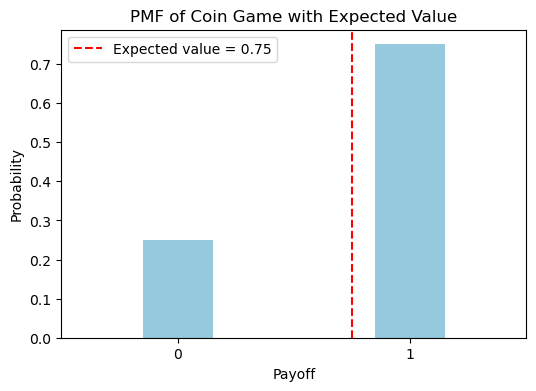

In [20]:
# Plot the expected value of the coin game in 
# a plot of the PMF using seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# PMF for the payoff in the coin game: payoff can be 1 with probability 0.75, 0 with probability 0.25
pmf = pd.DataFrame({
    'payoff': [0, 1],
    'probability': [0.25, 0.75]
})

# Compute expected value
expected_value = (pmf['payoff'] * pmf['probability']).sum()

plt.figure(figsize=(6,4))
ax = sns.barplot(x='payoff', y='probability', data=pmf, color='skyblue', width=0.3)
ax.set_ylabel('Probability')
ax.set_xlabel('Payoff')

# Add a vertical line for expected value
plt.axvline(expected_value, color='red', linestyle='--', label=f'Expected value = {expected_value:.2f}')

# Add legend
plt.legend()
plt.title('PMF of Coin Game with Expected Value')
plt.show()


## Variance

The expected value is the center of gravity of the PMF but two random variables with the same expected value can have very different distributions. You can get the same average payoff of 0.75 by a game where you win 2.5 EUR with probability 0.5 and lose 1 EUR with probability 0.5.

Exercise: verify that the expected value of the second game is also 0.75.

In [59]:
x2 = np.array([-1, 2.5])
p_x2 = np.array([0.5, 0.5])

# Compute the expected value of the second game

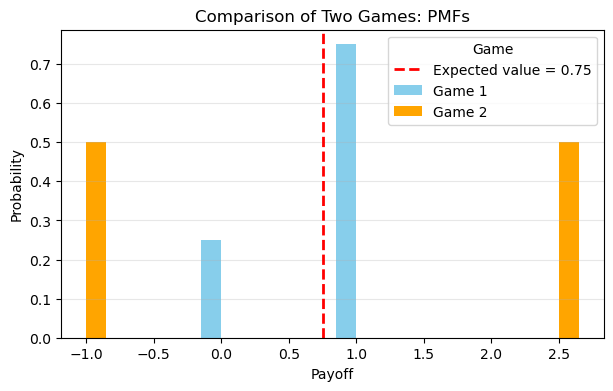

In [60]:
# Plot the first and the second PMF in the same plot

# First PMF (already defined as pmf)
pmf1 = pmf.copy()
pmf1['game'] = 'Game 1'

# Second PMF
pmf2 = pd.DataFrame({
    'payoff': [-1, 2.5],
    'probability': [0.5, 0.5],
    'game': 'Game 2'
})

expected_value_2 = (x2 * p_x2).sum()

fig, ax = plt.subplots(figsize=(7,4))

# Plot bars for each game manually with proper numeric positioning
width = 0.15
game1_data = pmf1[pmf1['game'] == 'Game 1']
game2_data = pmf2[pmf2['game'] == 'Game 2']

ax.bar(game1_data['payoff'] - width/2, game1_data['probability'], width=width, label='Game 1', color='skyblue')
ax.bar(game2_data['payoff'] + width/2, game2_data['probability'], width=width, label='Game 2', color='orange')

# Add expected value line
ax.axvline(expected_value_2, color='red', linestyle='--', linewidth=2, label=f'Expected value = {expected_value_2:.2f}')

ax.set_xlabel('Payoff')
ax.set_ylabel('Probability')
ax.set_title('Comparison of Two Games: PMFs')
ax.legend(title='Game')
ax.grid(axis='y', alpha=0.3)
plt.show()

As you see, the average payoff (expected value) is the same for both games but the distributions are quite different. The second distribution will produce payoffs that are much more different from the expected value than first distribution.

The average distance between the payoffs for the first game is

$$
|1 - 0.75| \cdot \frac{1}{4} + |0 - 0.75| \cdot \frac{3}{4} = 0.25 \cdot 0.25 + 0.75 \cdot 0.75 = 0.0625 + 0.5625 = 0.625
$$

For the second game, the average distance is

$$
|2.5 - 0.75| \cdot 0.5 + |-1 - 0.75| \cdot 0.5 = 1.75 \cdot 0.5 + 1.75 \cdot 0.5 = 1.75
$$

When you look at the expression above, note that these are nothing but weighted sums of the distances with the weights being the probabilities. There fore you can think about the average distance as the expected value of a new random variable $D$ that takes the value $|X - E(X)|$ with probability $f(x)$.

$$
E(|X - E(X)|) = \sum_x |x - E(X)| f(x)
$$

This quantity is called the expected (or mean) absolute deviation.

Another quantity that also measures the spread of a distribution is the expected squared deviation from the mean, known as the **variance**.


:::{#def-variance}
## Variance

For a discrete random variable $X$ with PMF $f(x)$, the variance is defined as

$$
Var(X) = E((X - E(X))^2) = \sum_x (x - E(X))^2 f(x)
$$

The square root of the variance is called the **standard deviation**.

$$
SD(X) = \sqrt{Var(X)}
$$

:::


## Variance and Risk

The second game from the previous exercise is more risky because the payoffs are more variable. To see this, let's say 1000 persons play both games 10 times each.

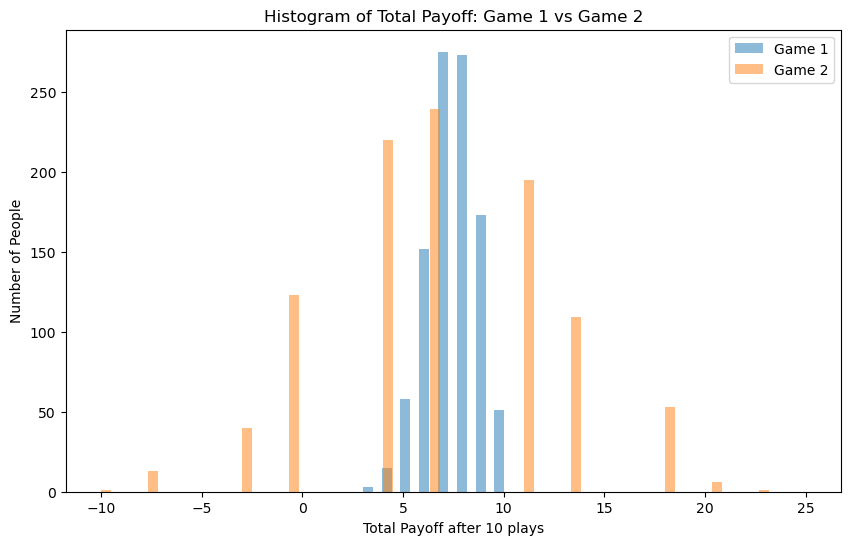

In [ ]:
game_1 = np.random.choice([0, 1], size=(10, 1000), p=[0.25, 0.75])
game_2 = np.random.choice([-1, 2.5], size=(10, 1000), p=[0.5, 0.5])

df = pd.DataFrame({
    'game_1': game_1.sum(axis=0),
    'game_2': game_2.sum(axis=0)
})
df.head()

# Plot the histogram of the results
plt.figure(figsize=(10, 6))
plt.hist(df['game_1'], bins=15, alpha=0.5, label='Game 1', width=0.5)
plt.hist(df['game_2'], bins=15, alpha=0.5, label='Game 2', width=0.5)
plt.xlabel('Total Payoff after 10 plays')
plt.ylabel('Number of People')
plt.title('Histogram of Total Payoff: Game 1 vs Game 2')
plt.legend()
plt.show()


## Exercise (Variance)

1. Compute the variance and the standard deviation of both games from the previous exercise.
2. Let's say that you are pricing the ticket for both games at 1 EUR. What are your expected profits in both cases? What is the standard deviation of your profits?
3. 

## The Bernoulli Distribution

The distribution of the first game that we have examined so far is extremely important and is called the Bernoulli distribution as it is able to model situations with two possible outcomes (like success/failure, win/lose, head/tail, healthy/sick, survival/death, etc.). It is a one-parameter distribution where the parameter $p$ denotes the probability of success (e.g. winning 1 EUR, getting heads, being healthy, surviving, etc.). The PMF of a Bernoulli distributed random variable $X$ is of the same form as the PMF of our coin tossing game, only the probability of winning 1 EUR is $p$ instead of $3/4$.

:::{#def-bernoulli}
## Bernoulli Distribution

A discrete random variable $X$ is said to follow a Bernoulli distribution with parameter $p$ (denoted by $X \sim Bernoulli(p)$) if its PMF is given by

$$
f(x) = \begin{cases}
p & \text{if } x = 1 \\
1 - p & \text{if } x = 0 \\
0 & \text{otherwise}
\end{cases}
$$

:::

Exercise: Derive the expected value and the variance of a Bernoulli distributed random variable.




:::{#exr-pmf-binomial-1}
## The Binomial Distribution (1)

Consider an experiment where you toss a coin $3$ times independently. Write down the sample space $\Omega$ as a set of sequences (e.g., $HHH$ for three heads). Let $X$ be the random variable that counts the number of heads in the sequence. Write down the PMF of $X$.

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The sample space is

$$
\Omega = \left\{\begin{array}{cccc}
    HHH & HHT & HTH & HTT \\
    THH & THT & TTH & TTT \\
\end{array}\right\}
$$

and has $2^3 = 8$ elements. The random variable $X$ is defined as the number of heads in the sequence. Under a probability model of equally likely outcomes the PMF of $X$ is

$$
f(x) = \begin{cases}
\frac{1}{8} & \text{if } x = 0 \\
\frac{3}{8} & \text{if } x = 1 \\
\frac{3}{8} & \text{if } x = 2 \\
\frac{1}{8} & \text{if } x = 3 \\
0 & \text{otherwise}
\end{cases}
$$

:::

Before we move on, let's look at the counting argument that leads to this PMF. We have obtained the PMF by counting the number of sequences that have $x$ heads and summing their probabilities (because they are disjoint events). For example, the probability of getting 1 head is the sum of the probabilities of the sequences $HTT$, $THT$, and $TTH$. We can generalize this by asking the following questions:

1. How many sequences of length 3 have no heads?

- There are 3! ways to arrange the heads and tails in the sequence.
- The order of the heads does not matter, so we divide by $0!$.
- The order of the tails does not matter and if the sequence has no heads, it must have $3 - 0 = 3$ tails. So we divide by $3!$.

Therefore, the number of sequences with no heads is

$$
\binom{3}{0} = \frac{3!}{0!3!} = 1
$$

2. How many sequence of length 3 have one head?

- There are 3! ways to arrange the heads and tails in the sequence.
- The order of the heads does not matter, so we divide by $1!$.
- The order of the tails does not matter and if the sequence has one head, it must have $3 - 1 = 2$ tails. So we divide by $2!$.

Therefore, the number of sequences with one head is

$$
\binom{3}{1} = \frac{3!}{1!2!} = 3
$$

3. How many sequences of length 3 have two heads?

- There are 3! ways to arrange the heads and tails in the sequence (as before).
- The order of the heads does not matter, so we divide by $2!$.
- The order of the tails does not matter and if the sequence has two heads, it must have $3 - 2 = 1$ tail. So we divide by $1!$.

Therefore, the number of sequences with two heads is

$$
\binom{3}{2} = \frac{3!}{2!1!} = 3
$$

4. How many sequences of length 3 have three heads?

- There are 3! ways to arrange the heads and tails in the sequence (as before).
- The order of the heads does not matter, so we divide by $3!$.
- The order of the tails does not matter and if the sequence has three heads, it must have $3 - 3 = 0$ tails. So we divide by $0! = 1$.

Therefore, the number of sequences with three heads is

$$
\binom{3}{3} = \frac{3!}{3!0!} = 1
$$


:::{#exr-binomial-equally}
## The Binomial Distribution (2)

Consider a similar experiment as in @exr-pmf-binomial-1 but this time you toss the coin not 3 but $n$ times independently. A random variable $X$ counts the number of heads in each sequence. Under a fair coin model all sequences in the sample space $\Omega$ are equally likely. Write down the PMF of $X$.

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The sample space consists of all sequences of length $n$ with heads and tails. There are $2^n$ elements in the sample space. 

$$
\Omega = \{(e_1, e_2, \ldots, e_n) | e_i \in \{H, T\}, i = 1,\ldots n \}
$$

The random variable $X$ counts the number of heads in each sequence. As all sequences are equally likely and the outcomes are mutually exclusive, we obtain the PMF of $X$ by counting the number of sequences with $x$ heads and dividing by the total number of sequences.

As in the exercise @exr-pmf-binomial-1, consider a sequence of length $n$ with $x$ heads.

- There are $n!$ ways to arrange the heads and tails in the sequence.
- The order of the heads does not matter, so we divide by $x!$.
- The order of the tails does not matter and if the sequence has $x$ heads, it must have $n - x$ tails. So we divide by $(n - x)!$.

Therefore, the number of sequences with $x$ heads is

$$
\binom{n}{x} = \frac{n!}{x!(n - x)!}
$$

The probability of each sequence is $1/2^n$ and so the PMF of $X$ is

$$
f(x) = \binom{n}{x} \left(\frac{1}{2}\right)^n
$$
:::


## The Bernoulli Distribution

The Bernoulli distribution is one of the simplest discrete probability distributions, yet it is extremely useful in practice. A Bernoulli random variable models an experiment with two possible outcomes, often referred to as "success" and "failure".

Examples?

Consider an experiment where you toss a coin four times independently. The sample space consists of all sequences of length four with heads and tails. There are $2^4 = 16$ elements in the sample space.

$$
\Omega = \left\{\begin{array}{llll}
HHHH & HHHT & HHTH & HHTT \\
HTHH & HTHT & HTTH & HTTT \\
THHH & THHT & THTH & THTT \\
TTHH & TTHT & TTTH & TTTT
\end{array}\right\}
$$

Consider a function $X$ that maps each element of the sample space to the real numbers. For example, let $X$ be the function that counts the number of heads in each outcome (a sequence of four coin tosses). The possible values of $X$ are $0, 1, 2, 3, 4$.
What is the probability that $X = 0, X = 1, X = 2, X = 3,$ or $X = 4$?

$X = 0$ if the outcome is TTTT. There is only one such outcome and so the probability is $1/16$.

$$
P(X = 0) = P(\{TTTT\}) = \frac{1}{16} \\
P(X = 1) = P(\{HTTT, THTT, TTHT, TTTH\}) = \frac{4}{16} \\
P(X = 2) = P(\{HHTT, HTHT, HTTH, THHT, THTH, TTHH\}) = \frac{6}{16} \\
P(X = 3) = P(\{HHHT, HHTH, HTHH, THHH\}) = \frac{4}{16} \\
P(X = 4) = P(\{HHHH\}) = \frac{1}{16}
$$

In the following we fill call functions like $X$ that map outcomes of an experiment to real numbers **random variables**. When the number of possible outcomes of the experiment is finite or countably infinite, we call the random variable **discrete**. We will talk about continuous random variables later in the course.


:::{#exr-pmf-binomial}
## The Binomial Distribution

In this exercise we will again consider a coin tossing experiment where you toss a coin $n$ times independently, but this time the coin will not be fair. Instead the probability of getting a head is $p$ and the probability of getting a tail is $1 - p$. Write down the PMF of the random variable $X$ that counts the number of heads in each sequence.

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

As in the previous two examples the sample space consists of all sequences of length $n$ with heads and tails. For a sequence of length $n$ with $x$ heads, the number of sequences is

$$
\binom{n}{x}
$$

The only difference is that the sequences are not equally likely anymore. We still assume that the tosses are independent.

Because of independence, the probability of a sequence with $x$ heads is

$$
p^x (1 - p)^{n - x}
$$

The PMF of $X$ is then

$$
f(x) = \binom{n}{x} p^x (1 - p)^{n - x}
$$

:::

Text(0, 0.5, 'Probability')

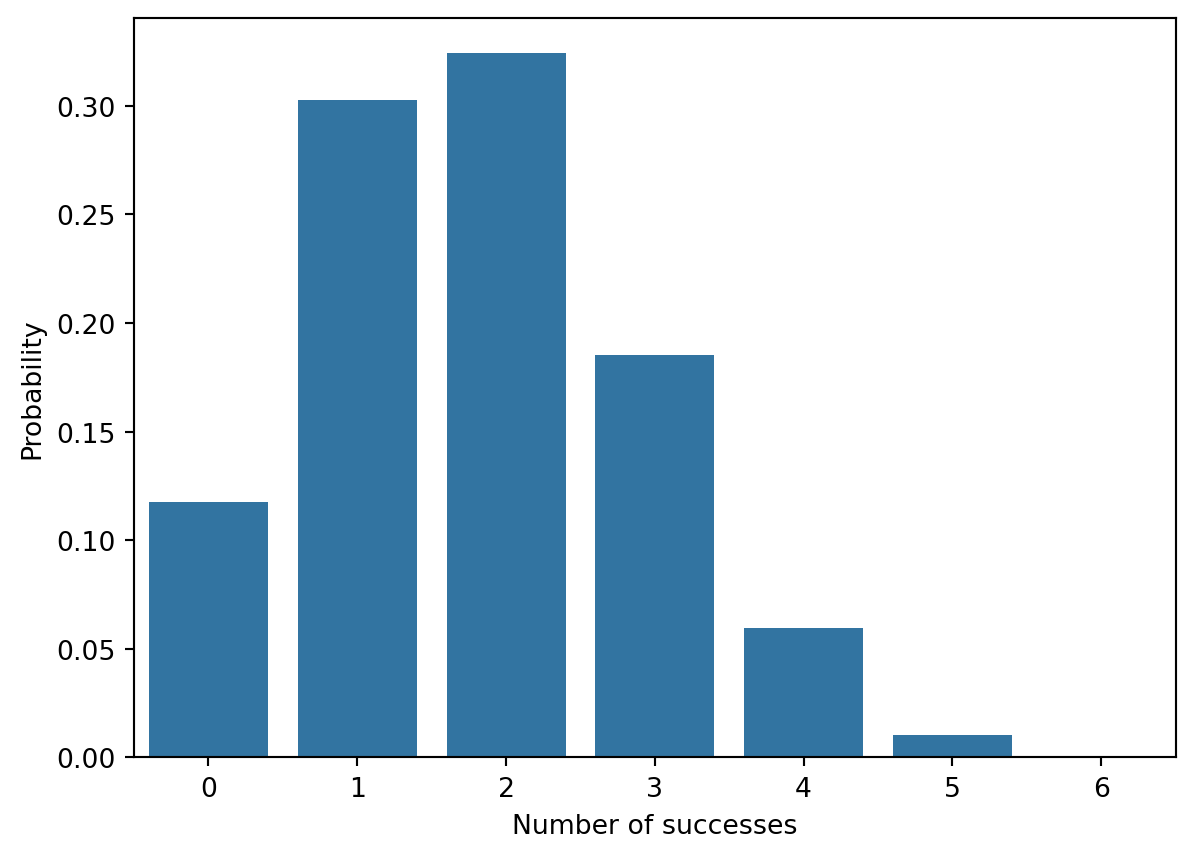

In [5]:
#| label: fig-binomial-pmf-plot
#| fig-cap: Plot of the probability mass function of the binomial distribution with parameters n=6 and p=0.3.
import numpy as np
from scipy.stats import binom

x = np.arange(0, 7)
y = binom.pmf(x, n=6, p=0.3)

sns.barplot(x=x, y=y)
plt.xlabel('Number of successes')
plt.ylabel('Probability')


Text(0.5666666666666655, 0.5, 'Proportions')

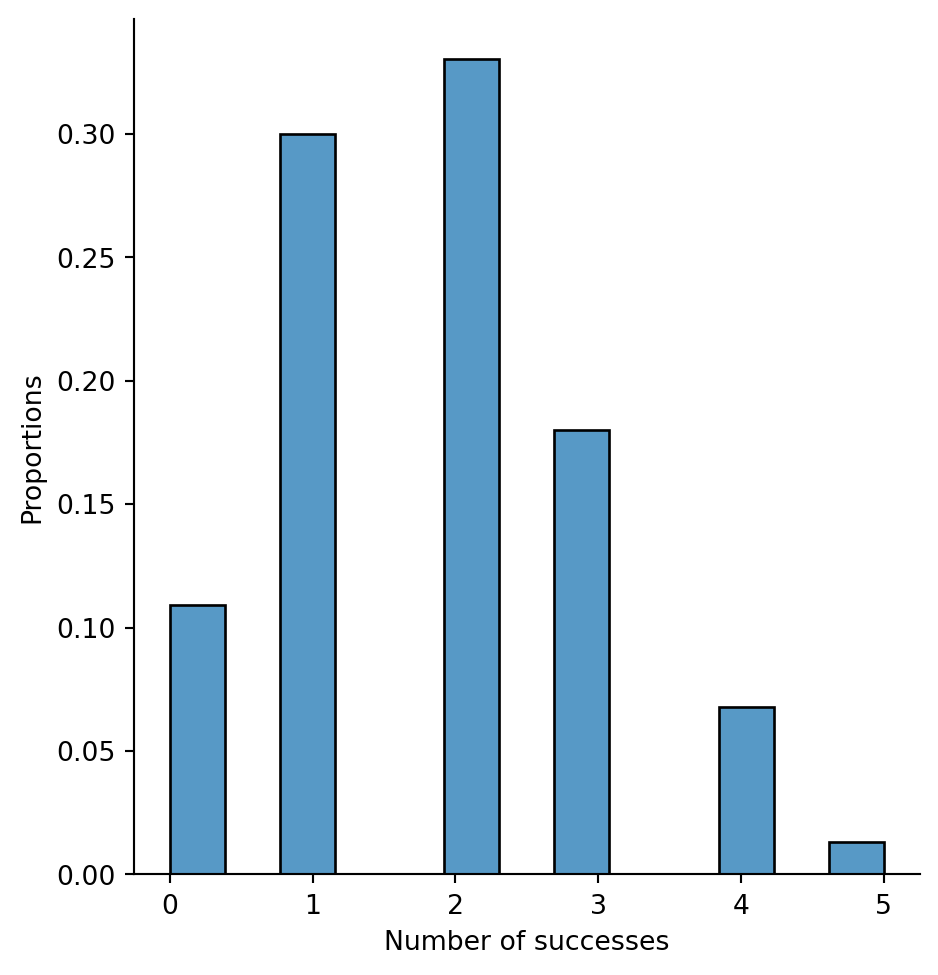

In [ ]:
#| label: fig-binomial-epmf-simulated
#| caption: Empirical probability mass function of the binomial distribution with parameters n=6 and p=0.3.

# Simulate the binomial distribution with n=6 and p=0.3

binomial = np.random.binomial(n=6, p=0.3, size=1000)

sns.displot(x=binomial, stat='probability')
plt.xlabel('Number of successes')
plt.ylabel('Proportions')
plt.show()


## Cumulative Distribution Function

The probability mass function (PMF) of a random variable $X$ gives the probability of each possible value of $X$. The cumulative distribution function (CDF) of $X$ gives the probability that $X$ is less than or equal to a given value $x$.

:::{#def-cdf}
## Cumulative Distribution Function

For a discrete random variable $X$, the cumulative distribution function (CDF) is defined as

$$
F(x) = P(X \leq x) = \sum_{y \leq x} f(y)
$$

where $f(y)$ is the PMF of $X$ and the sum runs over all possible values of $y$ that are less than or equal to $x$.

:::

:::{#exr-cdf}
## Properties of the CDF

Consider a discrete random variable $X$ with PMF $f(x)$ and CDF $F(x)$. Show that the CDF satisfies the following properties:

1. $F(x)$ is non-decreasing.
2. $F(x) \in [0, 1]$ for all $x$.
3. $\lim_{x \to -\infty} F(x) = 0$ and $\lim_{x \to \infty} F(x) = 1$.
4. $P(a < X \leq b) = F(b) - F(a)$ for all $a < b$.
5. $P(X = a) = F(a) - F(a - 1)$ for all $a$.
:::

:::{#exr-cdf-coins}
## CDF of the Coin Tossing Game

Consider our introductory example of the coin tossing game where you win 2 EUR for every head. Write down the CDF of the random variable $X$ that counts the amount of money you win and use it to calculate the following probabilities:

1. The probability of winning between 1.5 and 3 EUR (inclusive).
2. The probability to win more than 2.5 EUR.
3. The probability of winning between 2 and 6 EUR (inclusive).

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The PMF of $X$ is

$$
f(x) = \begin{cases}
\frac{1}{4} & \text{if } x = 0 \\
\frac{1}{2} & \text{if } x = 2 \\
\frac{1}{4} & \text{if } x = 4 \\
0 & \text{otherwise}
\end{cases}
$$

The CDF of $X$ is

$$
F(x) = \sum_{y \leq x} f(y)
$$

$$
F(x) = \begin{cases}
0 & \text{if } x < 0 \\
\frac{1}{4} & \text{if } 0 \leq x < 2 \\
\frac{3}{4} & \text{if } 2 \leq x < 4 \\
1 & \text{if } x \geq 4
\end{cases}
$$

The probability of winning between 1.5 and 3 EUR is

$$
P(1.5 \leq X \leq 3) = F(3) - F(1.5) + P(X = 1.5) = \frac{3}{4} - \frac{1}{4} + 0 = \frac{1}{2}
$$

The probability of winning more than 2.5 EUR is

$$
P(X > 2.5) = 1 - P(X \leq 2.5) = 1 - F(2.5) = 1 - \frac{3}{4} = \frac{1}{4}
$$

The probability of winning between 2 and 6 EUR is

$$
P(2 \leq X \leq 6) = F(6) - F(2) + P(X = 2) = 1 - \frac{3}{4} + 0 = \frac{1}{4}
$$


:::

Text(0, 0.5, 'Proportion of games with payoff less than or equal to x')

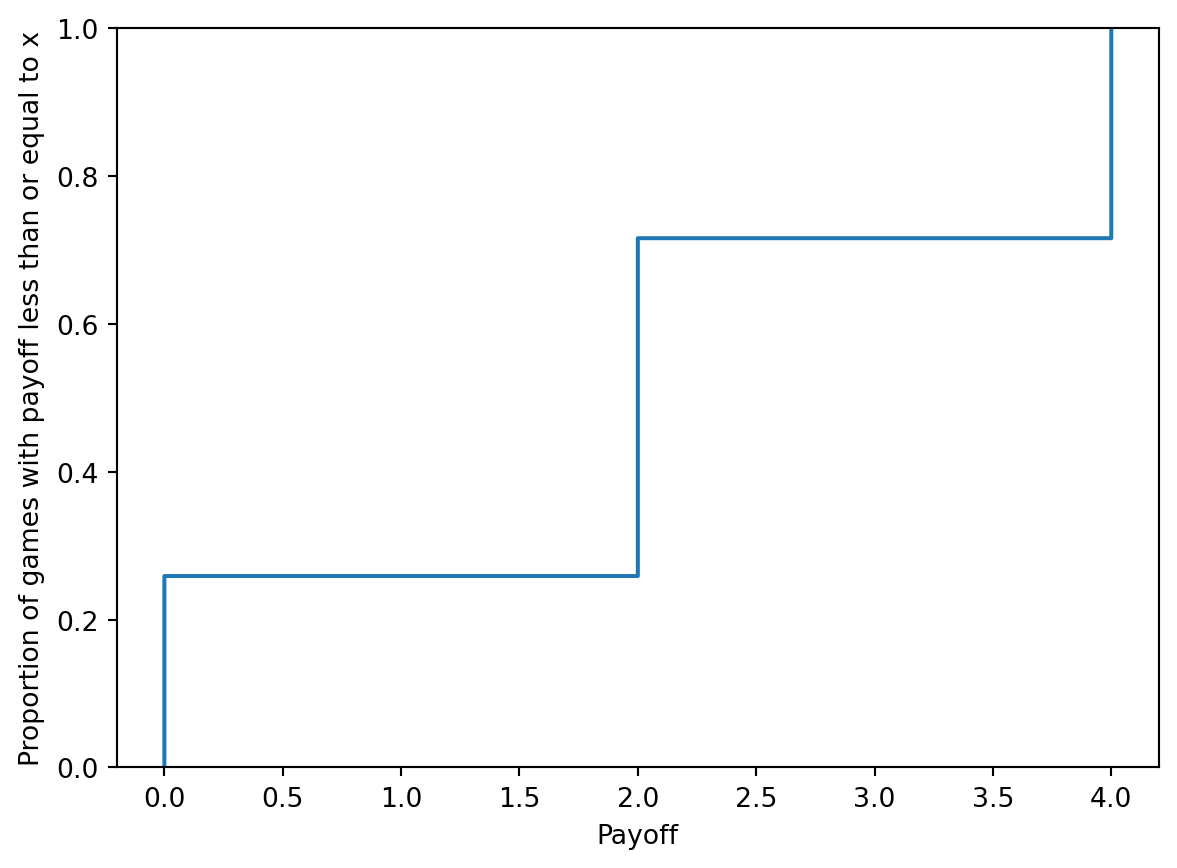

In [7]:
#| label: fig-coins-cdf-plot
#| fig-cap: Plot of the cumulative distribution function of the payoff of the coin game.

sns.ecdfplot(x=payoff)
plt.xlabel('Payoff')
plt.ylabel('Proportion of games with payoff less than or equal to x')


## Exercises

The statistical modeling of waiting times (e.g. number of hours or weeks until some event occurs) forms an important part of the applied work in statistics. Consider some examples:

- The number of days until a customer makes a purchase.
- The number of weeks until a machine breaks down.
- The number of hours until a light bulb burns out.

Assuming that these events may occur in every period with a fixed probability and assuming independence between the periods, all of these examples  

:::{#exr-geometric-distribution}
## Coin Tossing until the First Head

You toss a biased coin with probability of getting a head $p$. Assume that the tosses are independent. The random variable $X$ counts the number of tosses until the first head. Write down the PMF and CDF of $X$. Compute the following probabilities:

- The probability of getting a head on the first toss.
- The probability of waiting at least 3 tosses until the first head (for $p = 0.2$).
- The probability of waiting between 2 and 4 tosses until the first head (for $p = 0.2$).

:::

:::{.callout-note collapse="true"}
## Hint: Geometric Series (click to expand)

In the derivation of the CDF you will need an expression for the partial sum of a geometric series. The sum of the first $n$ terms of a geometric series is:

$$
\sum_{k = 0}^{n} r^k = \frac{1 - r^{n + 1}}{1 - r}, \quad r \neq 1
$$

where $r$ is the common ratio of the series. In this case, the common ratio is $1 - p$.

It is easy to show why the above equation holds:

$$
\begin{align*}
S_n &= 1 + r + r^2 + \ldots + r^{n - 1} + r^{n} \\
rS_n &= r + r^2 + \ldots + r^{n} + r^{n + 1} \\
\end{align*}
$$

Subtracting the second equation from the first gives

$$
S_n - rS_n = 1 - r^{n + 1} \Rightarrow S_n = \frac{1 - r^{n + 1}}{1 - r}
$$

:::

In [8]:
# Check it with numpy

pwr = np.array([0, 1, 2, 3, 4, 5])
series = 0.5 ** pwr
series

array([1.     , 0.5    , 0.25   , 0.125  , 0.0625 , 0.03125])

In [9]:
# Look at the partial sums

np.cumsum(series)

array([1.     , 1.5    , 1.75   , 1.875  , 1.9375 , 1.96875])

In [10]:
# Compare these to the result obtained using the formula

(1 - 0.5 ** (pwr + 1)) / (1 - 0.5)

array([1.     , 1.5    , 1.75   , 1.875  , 1.9375 , 1.96875])

:::{#exr-bulb-burnout}
## Light Bulb Burnout

A firm produces light bulbs that burn out after a random number of months. As the firm is issuing a warranty, it is interested in the distribution of the number of months until a bulb burns out, because this will determine the number of replacements it has to provide. The analytics department of the firm has estimated that each bulb is likely to burn out with a probability of 0.02 in each month and that the burnout of each bulb is independent of the other bulbs and between months.

What is the probability that a bulb burns out after the third month?
:::

:::{#exr-rare-events}
## The Number of Rare Events

Show that the following function is a valid PMF for a discrete random variable $X$ with values in the set $\{0, 1, 2, \ldots\}$ and parameter $\lambda > 0$:

$$
f(k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \ldots
$$

Use $\lambda = 2$ and compute the probabilities of $X$ taking the values 0 and 2.

:::

:::{.callout-note collapse="true"}
## Hint (click to expand)

Use the fact that 

$$
e^{\lambda} = \frac{\lambda^{0}}{0!} + \frac{\lambda^{1}}{1!} + \frac{\lambda^{2}}{2!} + \frac{\lambda^{3}}{3!} + \ldots
$$

:::